### Machine Learning Model For Predicting Thyroid Cancer Recurrence 
### Import Library Files

In [435]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install openpyxl

from matplotlib import pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [436]:
# Load the datasets
gdsc_df = pd.read_csv('GDSC_DATASET.csv')
compounds_annotation = pd.read_csv('Compounds-annotation.csv')
gdsc2_df = pd.read_csv('GDSC2-dataset.csv')
cell_lines_details = pd.read_excel('Cell_Lines_Details.xlsx')

### Dataset OVerview 

In [437]:
# Print the first few rows of each dataset
print("Head of GDSC Dataset:")
gdsc_df.head()



Head of GDSC Dataset:


,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


In [438]:

print("Head of Compounds Annotation Dataset:")
compounds_annotation.head()



Head of Compounds Annotation Dataset:


,DRUG_ID,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
0,1,MGH,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling
1,3,MGH,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling
2,5,MGH,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling
3,6,MGH,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling
4,9,MGH,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation


In [439]:
print("Head of GDSC2 Dataset:")
gdsc2_df.head()



Head of GDSC2 Dataset:


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741991,0.734047,0.128059,-0.807232


In [440]:
print("Head of Cell Lines Details Dataset:")
cell_lines_details.head()

Head of Cell Lines Details Dataset:


,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [441]:
gdsc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                240968 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 232669 non-null  object 
 9   GDSC Tissue descriptor 2                 232669 non-null  object 
 10  Cancer Type (matching TCGA label

In [442]:
compounds_annotation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DRUG_ID         621 non-null    int64 
 1   SCREENING_SITE  621 non-null    object
 2   DRUG_NAME       621 non-null    object
 3   SYNONYMS        418 non-null    object
 4   TARGET          579 non-null    object
 5   TARGET_PATHWAY  621 non-null    object
dtypes: int64(1), object(5)
memory usage: 29.2+ KB


In [443]:
gdsc2_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242036 entries, 0 to 242035
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DATASET          242036 non-null  object 
 1   NLME_RESULT_ID   242036 non-null  int64  
 2   NLME_CURVE_ID    242036 non-null  int64  
 3   COSMIC_ID        242036 non-null  int64  
 4   CELL_LINE_NAME   242036 non-null  object 
 5   SANGER_MODEL_ID  242036 non-null  object 
 6   TCGA_DESC        240969 non-null  object 
 7   DRUG_ID          242036 non-null  int64  
 8   DRUG_NAME        242036 non-null  object 
 9   PUTATIVE_TARGET  214881 non-null  object 
 10  PATHWAY_NAME     242036 non-null  object 
 11  COMPANY_ID       242036 non-null  int64  
 12  WEBRELEASE       242036 non-null  object 
 13  MIN_CONC         242036 non-null  float64
 14  MAX_CONC         242036 non-null  float64
 15  LN_IC50          242036 non-null  float64
 16  AUC              242036 non-null  floa

In [444]:
cell_lines_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sample Name                               1002 non-null   object 
 1   COSMIC identifier                         1001 non-null   float64
 2   Whole Exome Sequencing (WES)              1002 non-null   object 
 3   Copy Number Alterations (CNA)             1002 non-null   object 
 4   Gene Expression                           1002 non-null   object 
 5   Methylation                               1002 non-null   object 
 6   Drug
Response                             1002 non-null   object 
 7   GDSC
Tissue descriptor 1                  1001 non-null   object 
 8   GDSC
Tissue
descriptor 2                  1001 non-null   object 
 9   Cancer Type
(matching TCGA label)         826 non-null    object 
 10  Microsatellite 
instability Status (

### Data Preprocessing

In [445]:
# Check for missing values in each dataset
print("Missing values in GDSC Dataset:")
print(gdsc_df.isnull().sum(), "\n")



Missing values in GDSC Dataset:
COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME                                      0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9366
GDSC Tissue descriptor 2                    9366
Cancer Type (matching TCGA label)          51446
Microsatellite instability Status (MSI)    12353
Screen Medium                               9366
Growth Properties                           9366
CNA                                         9366
Gene Expression                             9366
Methylation                                 9366
TARGET                                     27155
TARGET_PATHWAY                                 0
dtype: int64 



In [446]:
print("Missing values in Compounds Annotation Dataset:")
print(compounds_annotation.isnull().sum(), "\n")



Missing values in Compounds Annotation Dataset:
DRUG_ID             0
SCREENING_SITE      0
DRUG_NAME           0
SYNONYMS          203
TARGET             42
TARGET_PATHWAY      0
dtype: int64 



In [447]:
print("Missing values in GDSC2 Dataset:")
print(gdsc2_df.isnull().sum(), "\n")




Missing values in GDSC2 Dataset:
DATASET                0
NLME_RESULT_ID         0
NLME_CURVE_ID          0
COSMIC_ID              0
CELL_LINE_NAME         0
SANGER_MODEL_ID        0
TCGA_DESC           1067
DRUG_ID                0
DRUG_NAME              0
PUTATIVE_TARGET    27155
PATHWAY_NAME           0
COMPANY_ID             0
WEBRELEASE             0
MIN_CONC               0
MAX_CONC               0
LN_IC50                0
AUC                    0
RMSE                   0
Z_SCORE                0
dtype: int64 



In [448]:
print("Missing values in Cell Lines Details Dataset:")
print(cell_lines_details.isnull().sum(), "\n")

Missing values in Cell Lines Details Dataset:
Sample Name                                    0
COSMIC identifier                              1
Whole Exome Sequencing (WES)                   0
Copy Number Alterations (CNA)                  0
Gene Expression                                0
Methylation                                    0
Drug\nResponse                                 0
GDSC\nTissue descriptor 1                      1
GDSC\nTissue\ndescriptor 2                     1
Cancer Type\n(matching TCGA label)           176
Microsatellite \ninstability Status (MSI)     16
Screen Medium                                  1
Growth Properties                              3
dtype: int64 



In [449]:
# Drop rows with missing values in each dataset
gdsc_df_cleaned = gdsc_df.dropna()
compounds_annotation_cleaned = compounds_annotation.dropna()
gdsc2_df_cleaned = gdsc2_df.dropna()
cell_lines_details_cleaned = cell_lines_details.dropna()

# Print the number of rows before and after dropping missing values
print("GDSC Dataset: Before =", gdsc_df.shape[0], "After =", gdsc_df_cleaned.shape[0])
print("Compounds Annotation Dataset: Before =", compounds_annotation.shape[0], "After =", compounds_annotation_cleaned.shape[0])
print("GDSC2 Dataset: Before =", gdsc2_df.shape[0], "After =", gdsc2_df_cleaned.shape[0])
print("Cell Lines Details Dataset: Before =", cell_lines_details.shape[0], "After =", cell_lines_details_cleaned.shape[0])


GDSC Dataset: Before = 242035 After = 166644
Compounds Annotation Dataset: Before = 621 After = 410
GDSC2 Dataset: Before = 242036 After = 213825
Cell Lines Details Dataset: Before = 1002 After = 812


### Expolatory Data Analysis ( EDA )

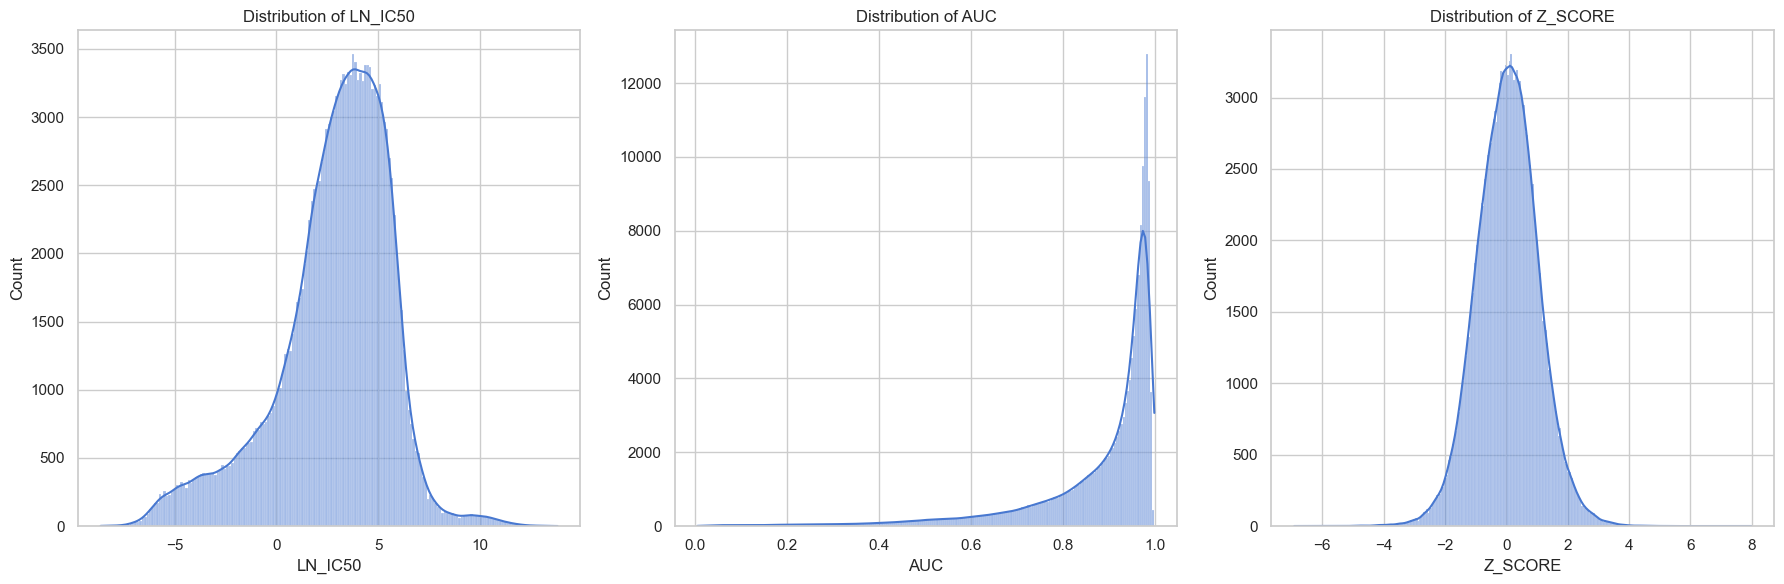

In [450]:
# 4. Distribution Analysis of Key Variables
# Visualizing distribution of IC50, AUC, and Z_SCORE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(gdsc_df_cleaned['LN_IC50'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of LN_IC50')

sns.histplot(gdsc_df_cleaned['AUC'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of AUC')

sns.histplot(gdsc_df_cleaned['Z_SCORE'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Z_SCORE')

plt.tight_layout()
plt.show()

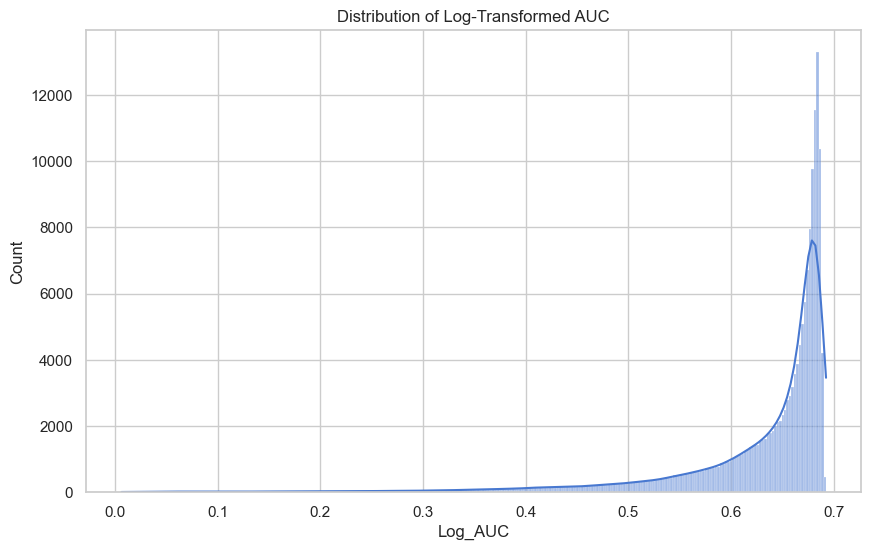

In [451]:
# 9. Feature Engineering Example: Create a new column 'Log_AUC' based on AUC
gdsc_df_cleaned['Log_AUC'] = np.log(gdsc_df_cleaned['AUC'] + 1)  # Log transform to stabilize variance

# Visualize the effect of log transformation on AUC
plt.figure(figsize=(10, 6))
sns.histplot(gdsc_df_cleaned['Log_AUC'], kde=True)
plt.title('Distribution of Log-Transformed AUC')
plt.show()

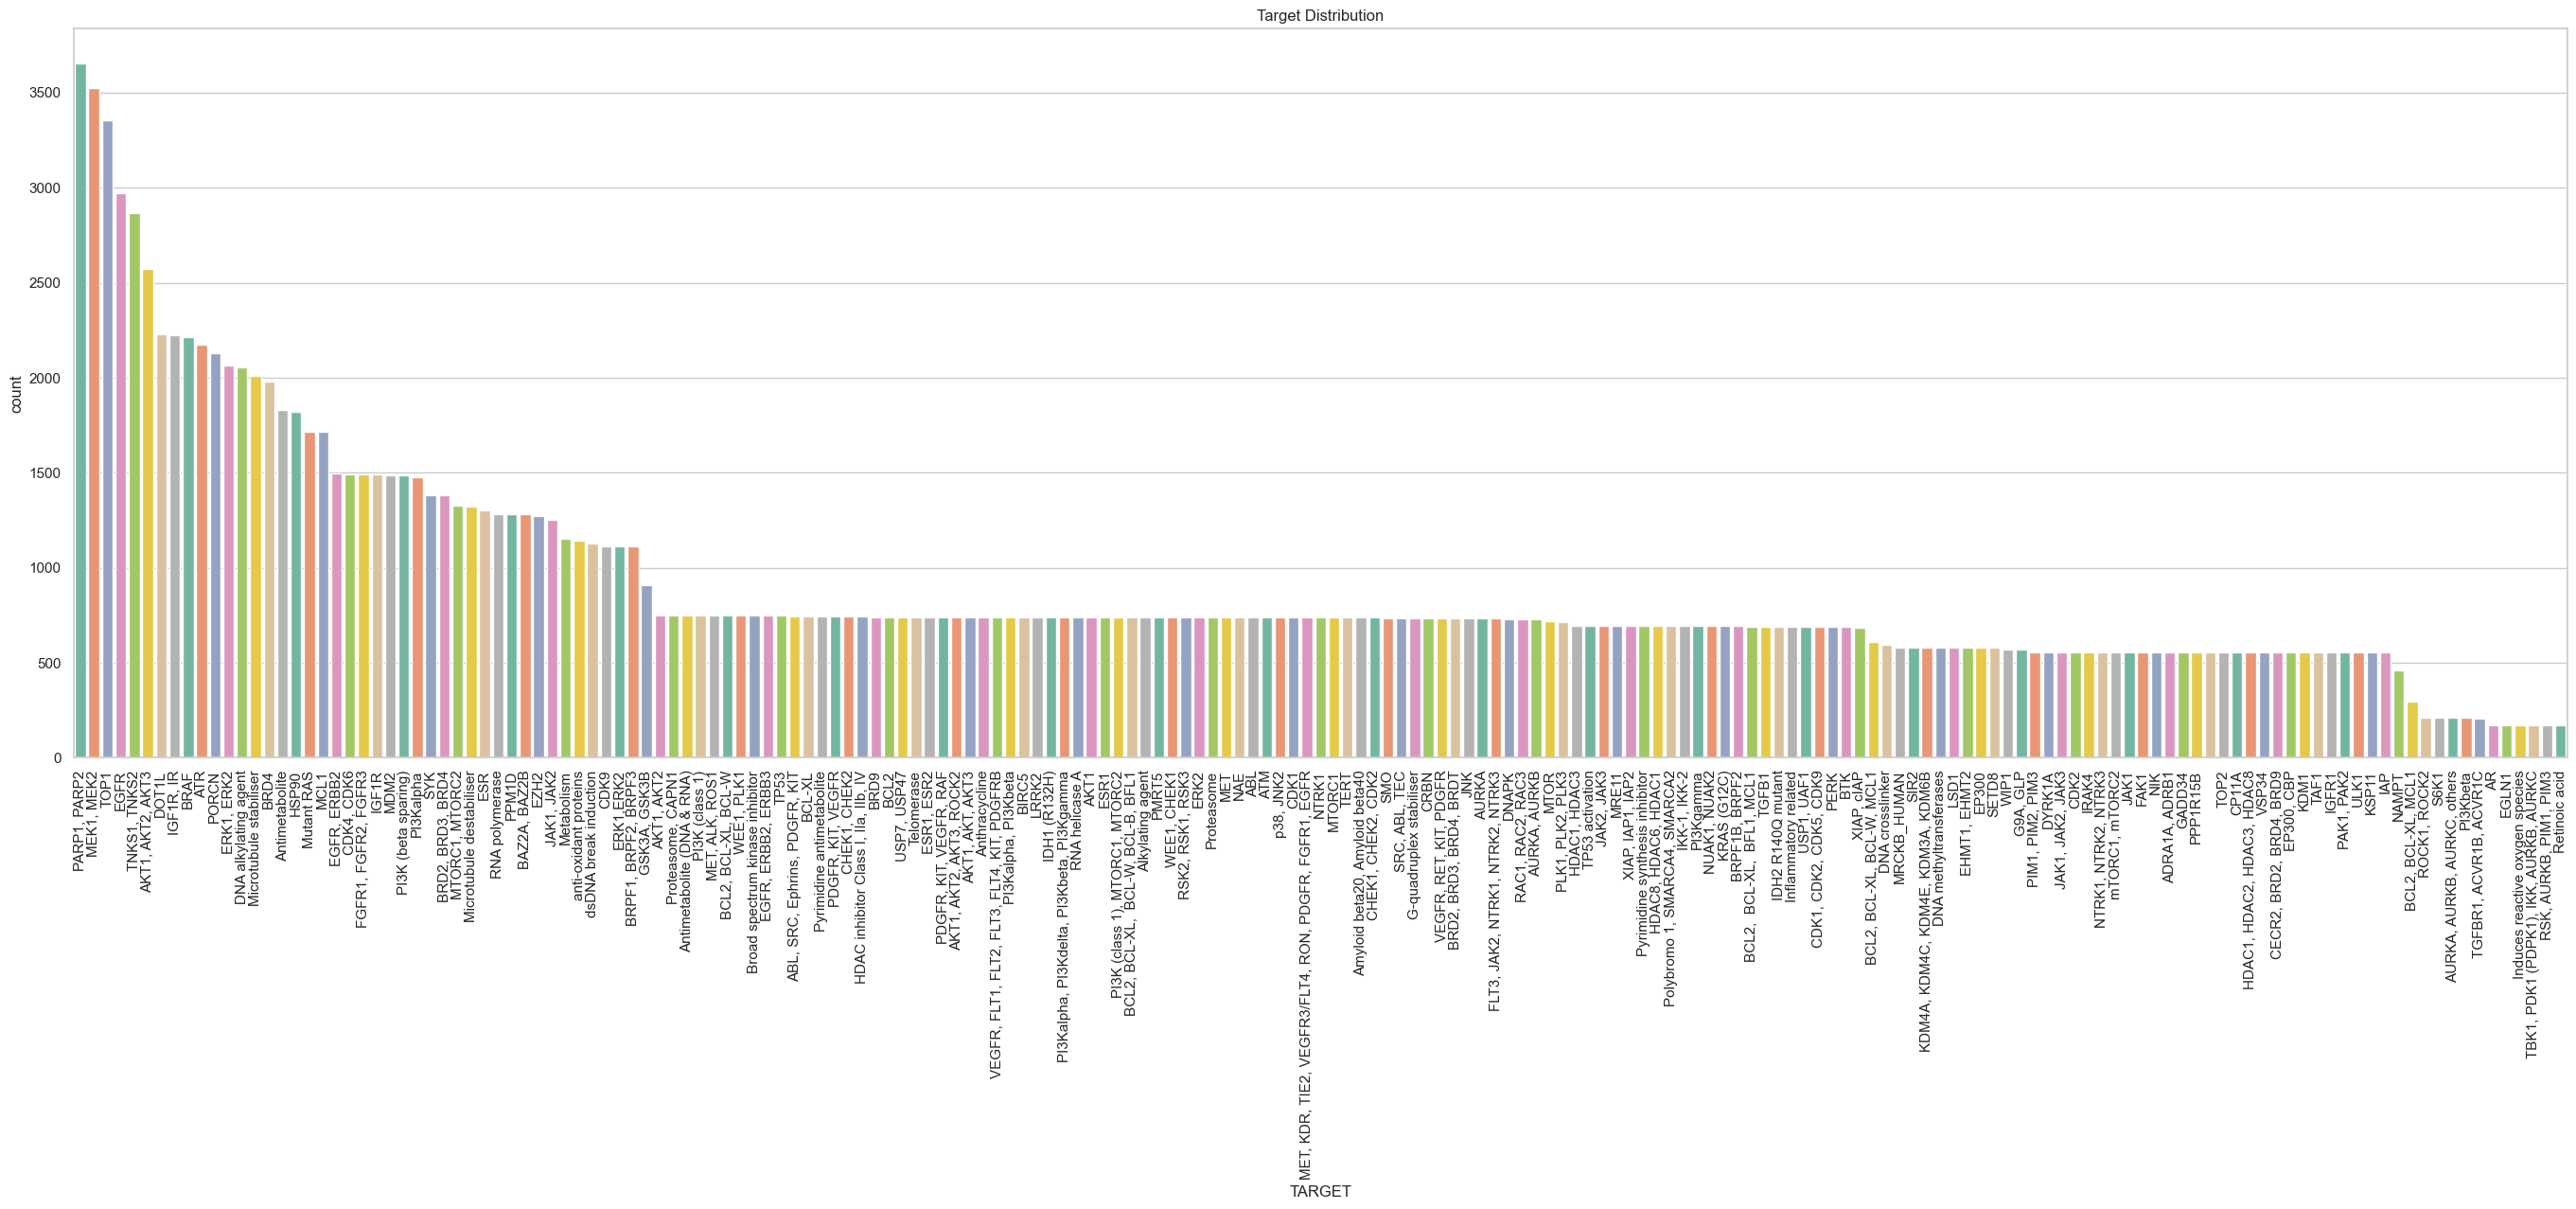

In [452]:
# 6. Distribution of Categorical Variables
# Barplot for 'TARGET' and 'TARGET_PATHWAY'
plt.figure(figsize=(34, 10))
sns.countplot(x='TARGET', data=gdsc_df_cleaned, palette='Set2', order=gdsc_df_cleaned['TARGET'].value_counts().index)
plt.title('Target Distribution')
plt.xticks(rotation=90)
plt.show()

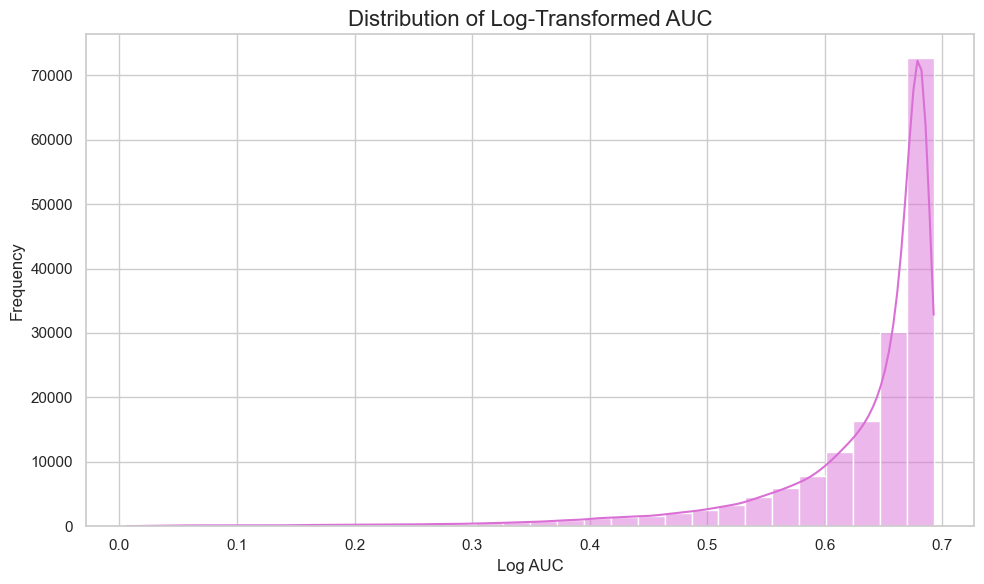

In [453]:
# 6. Feature Engineering Example: Create a new column 'Log_AUC' based on AUC
gdsc_df_cleaned['Log_AUC'] = np.log(gdsc_df_cleaned['AUC'] + 1)  # Log transform to stabilize variance

# Visualize the effect of log transformation on AUC
plt.figure(figsize=(10, 6))
sns.histplot(gdsc_df_cleaned['Log_AUC'], kde=True, color='orchid', bins=30)
plt.title('Distribution of Log-Transformed AUC', fontsize=16)
plt.xlabel('Log AUC', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

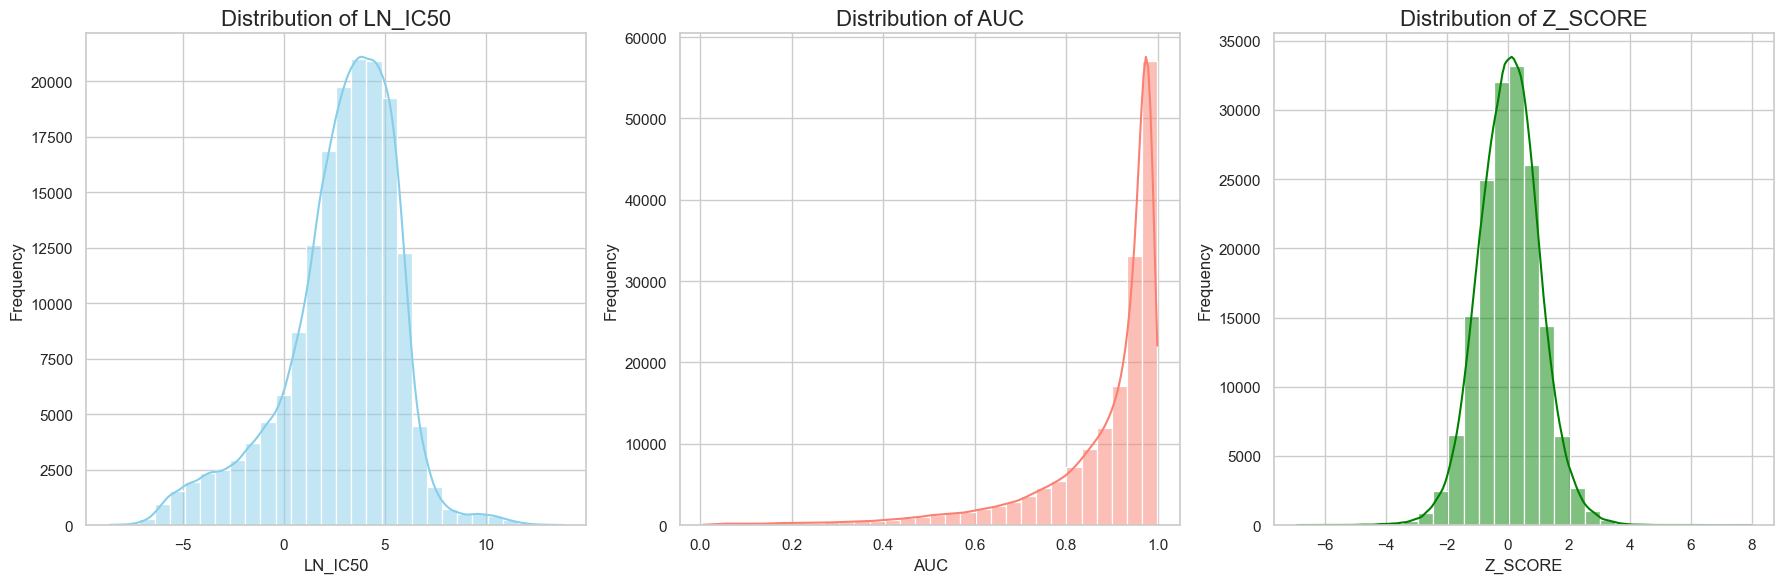

In [454]:

# 1. Distribution Analysis of Key Variables
# Visualizing distribution of IC50, AUC, and Z_SCORE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(gdsc_df_cleaned['LN_IC50'], kde=True, ax=axes[0], color='skyblue', bins=30)
axes[0].set_title('Distribution of LN_IC50', fontsize=16)
axes[0].set_xlabel('LN_IC50', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(gdsc_df_cleaned['AUC'], kde=True, ax=axes[1], color='salmon', bins=30)
axes[1].set_title('Distribution of AUC', fontsize=16)
axes[1].set_xlabel('AUC', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(gdsc_df_cleaned['Z_SCORE'], kde=True, ax=axes[2], color='green', bins=30)
axes[2].set_title('Distribution of Z_SCORE', fontsize=16)
axes[2].set_xlabel('Z_SCORE', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [455]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

In [456]:

# Drop columns that are not useful for modeling (like object columns that are not informative)
gdsc2_df_cleaned = gdsc2_df_cleaned.drop(columns=['CELL_LINE_NAME', 'SANGER_MODEL_ID', 'TCGA_DESC', 'DRUG_NAME', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'WEBRELEASE'])

# Drop rows with missing values in the target column
gdsc2_df_cleaned = gdsc2_df_cleaned.dropna(subset=['LN_IC50'])

# Separate features (X) and target (y)
X = gdsc2_df_cleaned.drop(columns=['LN_IC50'])
y = gdsc2_df_cleaned['LN_IC50']

# Step 2: Handle Categorical Variables & Feature Scaling
# Identify categorical columns that need encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply OneHotEncoding to categorical columns
# Use a ColumnTransformer to apply preprocessing to both numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling
### Random Forest Regressor 

In [457]:
# Apply preprocessing within a pipeline
# We will create a pipeline to ensure preprocessing and model training occur in sequence
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # Example: RandomForestRegressor, can be changed
])

# Step 4: Model Training
pipeline.fit(X_train, y_train)

# Step 5: Predictions
y_pred = pipeline.predict(X_test)

# Step 6: Model Evaluation
def evaluate_model(predictions, true_values):
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    return mse, rmse, mae, r2

# Evaluate RandomForestRegressor
rf_mse, rf_rmse, rf_mae, rf_r2 = evaluate_model(y_pred, y_test)

# Print evaluation results
print("Random Forest Regressor Evaluation:")
print(f"MSE: {rf_mse}, RMSE: {rf_rmse}, MAE: {rf_mae}, R2: {rf_r2}")


Random Forest Regressor Evaluation:
MSE: 0.08252052733612429, RMSE: 0.28726386360996453, MAE: 0.1586659554659184, R2: 0.9897738225597844


### Linear Regression 

In [458]:

# Linear Regression Model (in the same pipeline format)
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)
lr_pred = pipeline_lr.predict(X_test)
lr_mse, lr_rmse, lr_mae, lr_r2 = evaluate_model(lr_pred, y_test)

print("\nLinear Regression Evaluation:")
print(f"MSE: {lr_mse}, RMSE: {lr_rmse}, MAE: {lr_mae}, R2: {lr_r2}")



Linear Regression Evaluation:
MSE: 2.498517638627196, RMSE: 1.5806699967504907, MAE: 1.0896249837375305, R2: 0.690376618583177


### XGBoost Model

In [459]:
# XGBoost Model
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

pipeline_xgb.fit(X_train, y_train)
xgb_pred = pipeline_xgb.predict(X_test)
xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = evaluate_model(xgb_pred, y_test)

print("\nXGBoost Evaluation:")
print(f"MSE: {xgb_mse}, RMSE: {xgb_rmse}, MAE: {xgb_mae}, R2: {xgb_r2}")


XGBoost Evaluation:
MSE: 0.1314089752598891, RMSE: 0.362503758959668, MAE: 0.25991761196150165, R2: 0.9837154276441923


### Comparison

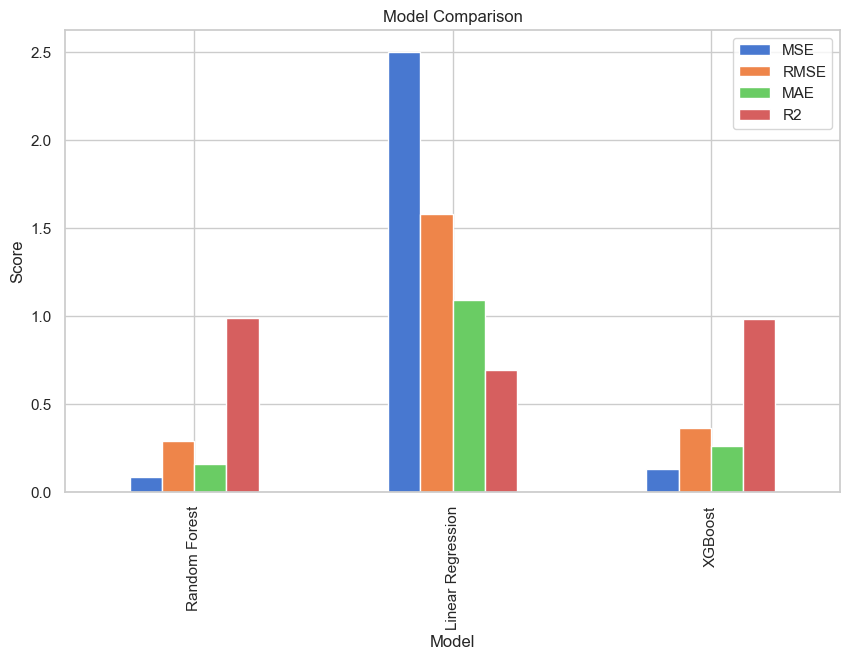

In [460]:
# Create a DataFrame to store model performance
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'XGBoost'],
    'MSE': [rf_mse, lr_mse, xgb_mse],
    'RMSE': [rf_rmse, lr_rmse, xgb_rmse],
    'MAE': [rf_mae, lr_mae, xgb_mae],
    'R2': [rf_r2, lr_r2, xgb_r2]
})

# Plotting Model Comparison
model_comparison.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()


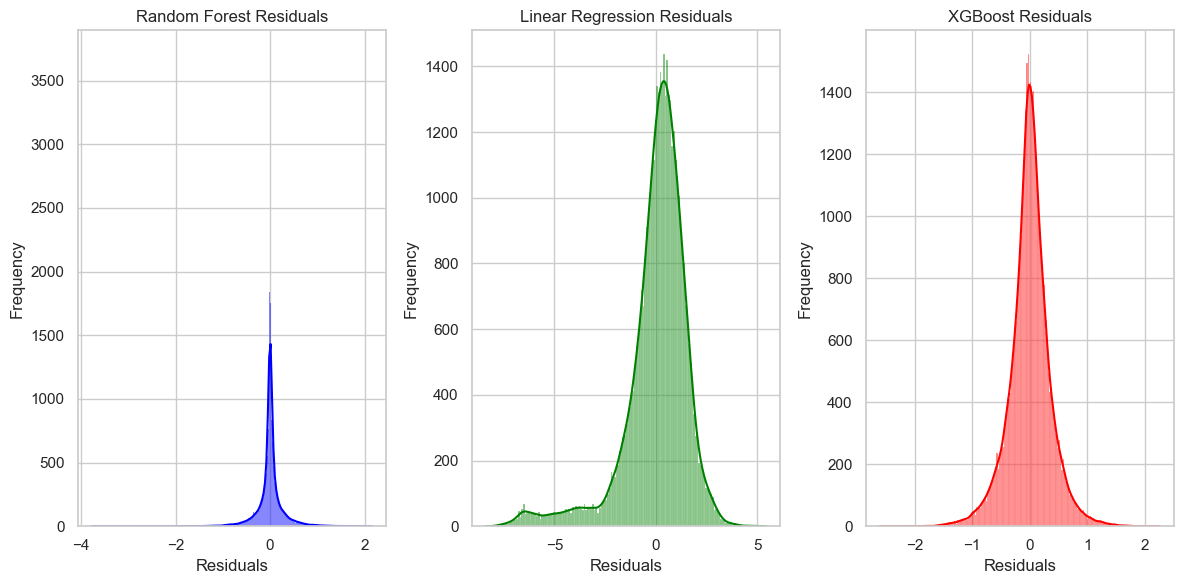

In [461]:
# Residuals for each model
rf_residuals = y_test - y_pred
lr_residuals = y_test - lr_pred
xgb_residuals = y_test - xgb_pred

# Plotting histograms for residuals
plt.figure(figsize=(12, 6))

# Random Forest Residuals
plt.subplot(1, 3, 1)
sns.histplot(rf_residuals, kde=True, color='blue')
plt.title('Random Forest Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Linear Regression Residuals
plt.subplot(1, 3, 2)
sns.histplot(lr_residuals, kde=True, color='green')
plt.title('Linear Regression Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# XGBoost Residuals
plt.subplot(1, 3, 3)
sns.histplot(xgb_residuals, kde=True, color='red')
plt.title('XGBoost Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
